## 1. General Preparation

Import some common libraries.

In [1]:
import time
from tqdm import tqdm

Use GPU Facilities.

In [2]:
import torch
cuda_id = 0
device = torch.device("cuda:%s" % cuda_id if torch.cuda.is_available() else "cpu")
device_name = torch.cuda.get_device_name(cuda_id) if torch.cuda.is_available() else "cpu"
print("We are using the device %s - %s" % (device, device_name))

We are using the device cuda:0 - Tesla T4


In [3]:
!pip install kaggle

In [4]:
from google.colab import files

# Upload kaggle.json file
uploaded = files.upload()

# Create a kaggle folder and move the kaggle.json file there
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [5]:
!kaggle datasets download -d mansourehk/shemo-persian-speech-emotion-detection-database

100% 826M/829M [00:24<00:00, 33.7MB/s]
100% 829M/829M [00:24<00:00, 35.7MB/s]


In [6]:
!unzip shemo-persian-speech-emotion-detection-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: transcript/final script/F24A22.tra  
  inflating: transcript/final script/F24A23.tra  
  inflating: transcript/final script/F24A24.tra  
  inflating: transcript/final script/F24A25.tra  
  inflating: transcript/final script/F24A26.tra  
  inflating: transcript/final script/F24A27.tra  
  inflating: transcript/final script/F24A28.tra  
  inflating: transcript/final script/F24A29.tra  
  inflating: transcript/final script/F24A30.tra  
  inflating: transcript/final script/F24A31.tra  
  inflating: transcript/final script/F24A32.tra  
  inflating: transcript/final script/F24A33.tra  
  inflating: transcript/final script/F24A34.tra  
  inflating: transcript/final script/F24A35.tra  
  inflating: transcript/final script/F24A36.tra  
  inflating: transcript/final script/F24A37.tra  
  inflating: transcript/final script/F24A38.tra  
  inflating: transcript/final script/F24A39.tra  
  inflating: transcript/final script/F24A40.tra  

In [7]:
import os
import shutil

# Specify the directory where your files are located
source_directory = "./male"

# Iterate through all files in the source directory
for filename in os.listdir(source_directory):
    if os.path.isfile(os.path.join(source_directory, filename)):
        # Get the 4th character from the filename
        fourth_character = filename[3]  # Python uses 0-based indexing

        # Create a directory for the 4th character (if it doesn't exist)
        target_directory = os.path.join(source_directory, fourth_character)
        os.makedirs(target_directory, exist_ok=True)

        # Move the file to the appropriate directory
        shutil.move(
            os.path.join(source_directory, filename),
            os.path.join(target_directory, filename)
        )

print("Files categorized successfully!")



Files categorized successfully!


In [8]:
import os
import shutil

# Specify the directory where your files are located
source_directory = "./female"

# Iterate through all files in the source directory
for filename in os.listdir(source_directory):
    if os.path.isfile(os.path.join(source_directory, filename)):
        # Get the 4th character from the filename
        fourth_character = filename[3]  # Python uses 0-based indexing

        # Create a directory for the 4th character (if it doesn't exist)
        target_directory = os.path.join(source_directory, fourth_character)
        os.makedirs(target_directory, exist_ok=True)

        # Move the file to the appropriate directory
        shutil.move(
            os.path.join(source_directory, filename),
            os.path.join(target_directory, filename)
        )

print("Files categorized successfully!")



Files categorized successfully!


In [9]:
!mkdir Voice

In [10]:
!cp -r female Voice/female

In [11]:
!cp -r male Voice/male

In [12]:
import os

# Specify the directory where your categorized folders are located
categorized_directory = "/content/Voice/"

# Initialize a dictionary to store the counts
file_counts = {}

# Iterate through the subdirectories (folders)
for gender in os.listdir(categorized_directory):
  for folder_name in os.listdir(categorized_directory+gender):
      folder_path = os.path.join(categorized_directory+gender, folder_name)

      if os.path.isdir(folder_path):
          # Count the files in each subdirectory
          file_count = len(os.listdir(folder_path))

          # Store the count in the dictionary
          file_counts[folder_name] = file_count

# Print the counts
for folder_name, count in file_counts.items():
    print(f"Folder '{folder_name}': {count} files")


Folder 'S': 178 files
Folder 'A': 604 files
Folder 'N': 744 files
Folder 'H': 90 files
Folder 'W': 105 files
Folder 'F': 16 files


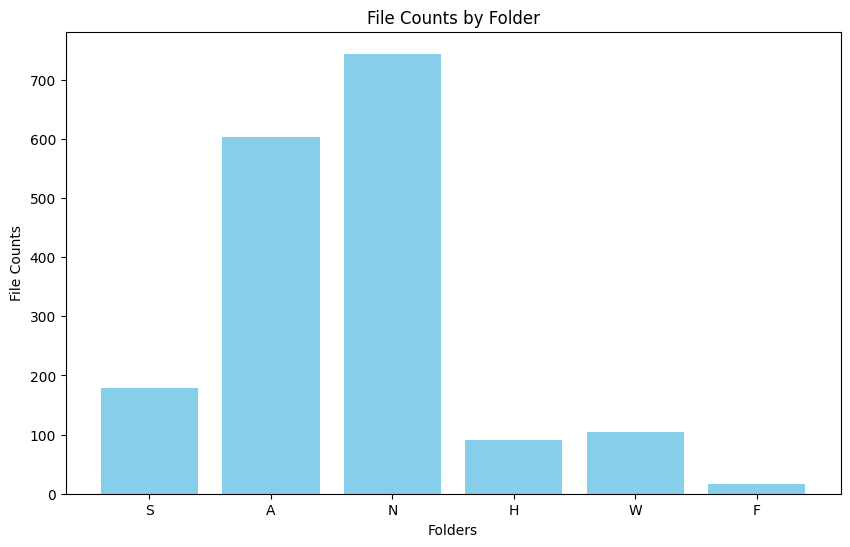

In [13]:
import matplotlib.pyplot as plt
# Extract folder names and counts
folders = list(file_counts.keys())
counts = list(file_counts.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(folders, counts, color='skyblue')
plt.xlabel('Folders')
plt.ylabel('File Counts')
plt.title('File Counts by Folder')
plt.show()

In [14]:
import os
import pandas as pd

RAV = "./Voice/"
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []

for i in dir_list:
    folder_name = os.listdir(RAV + i)
    for f in folder_name:
        fname = os.listdir(RAV + i + "/" + f)
        for files in fname:
            gender.append(i)
            path.append(RAV + i + '/' + f + '/' + files)
            emotion.append(f)

df = pd.DataFrame({'gender': gender, 'emotion': emotion, 'path': path})

# Convert Emotion labels from string to numeric
labels = df['emotion'].unique()
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

df['labels'] = df['emotion'].map(label2id)

In [15]:
df

,gender,emotion,path,labels
0,female,S,./Voice/female/S/F21S03.wav,0
1,female,S,./Voice/female/S/F24S05.wav,0
2,female,S,./Voice/female/S/F09S11.wav,0
3,female,S,./Voice/female/S/F03S17.wav,0
4,female,S,./Voice/female/S/F09S06.wav,0
...,...,...,...,...
2995,male,F,./Voice/male/F/M19F01.wav,5
2996,male,F,./Voice/male/F/M21F01.wav,5
2997,male,F,./Voice/male/F/M26F01.wav,5
2998,male,F,./Voice/male/F/M07F03.wav,5


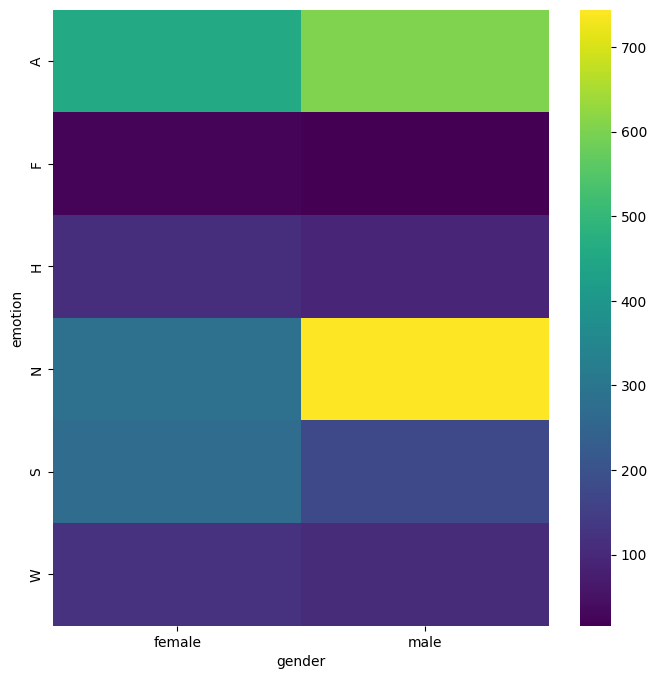

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['emotion'].value_counts()
    for x_label, grp in df.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('emotion')

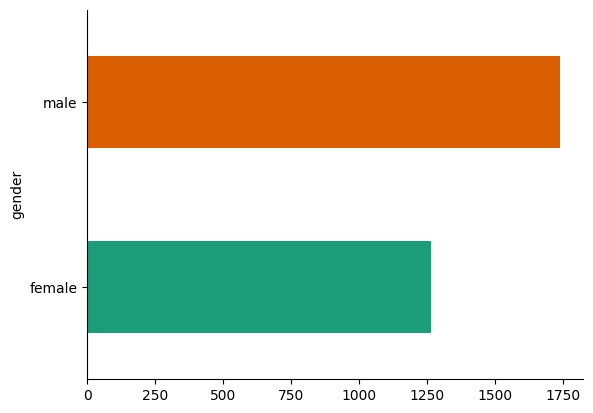

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
import pandas as pd
target_count = 150

# Get the count of each label
f_count = df[df['emotion'] == 'F'].shape[0]

# Calculate how many new samples you need for label
additional_f = target_count - f_count


# Randomly duplicate the necessary number of samples
oversampled_f = df[df['emotion'] == 'F'].sample(additional_f, replace=True)


# Append these new samples to the original dataframe
df_oversampled = pd.concat([df, oversampled_f])





In [19]:
df_oversampled

,gender,emotion,path,labels
0,female,S,./Voice/female/S/F21S03.wav,0
1,female,S,./Voice/female/S/F24S05.wav,0
2,female,S,./Voice/female/S/F09S11.wav,0
3,female,S,./Voice/female/S/F03S17.wav,0
4,female,S,./Voice/female/S/F09S06.wav,0
...,...,...,...,...
1256,female,F,./Voice/female/F/F16F01.wav,5
2985,male,F,./Voice/male/F/M03F01.wav,5
1250,female,F,./Voice/female/F/F26F02.wav,5
1246,female,F,./Voice/female/F/F01F03.wav,5


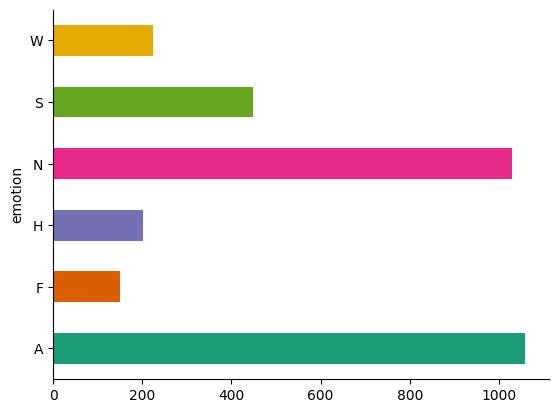

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
df_oversampled.groupby('emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
# Determine the number of samples to keep
n_samples = 500

# Randomly sample n_samples from each of the 'N' and 'A' classes
n_samples_df = df_oversampled[df_oversampled['emotion'] == 'N'].sample(n=n_samples)
a_samples_df = df_oversampled[df_oversampled['emotion'] == 'A'].sample(n=n_samples)

# Combine the undersampled classes with the rest of the dataset
other_samples_df = df_oversampled[~df_oversampled['emotion'].isin(['N', 'A'])]
balanced_df = pd.concat([n_samples_df, a_samples_df, other_samples_df])



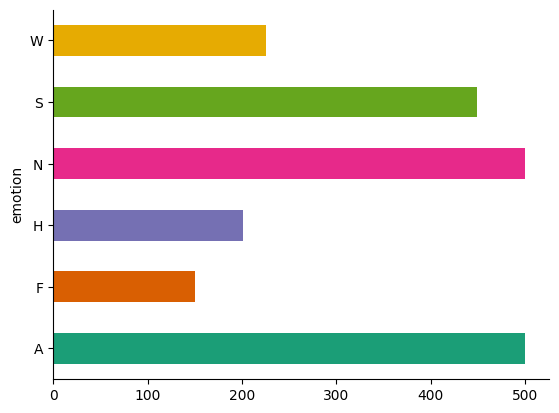

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
balanced_df.groupby('emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(balanced_df, test_size=0.2, random_state=42, stratify=balanced_df['labels'])

val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['labels'])

In [24]:
train_df

,gender,emotion,path,labels
1261,female,F,./Voice/female/F/F21F01.wav,5
2684,male,N,./Voice/male/N/M05N05.wav,2
2343,male,N,./Voice/male/N/M04N29.wav,2
2056,male,N,./Voice/male/N/M40N46.wav,2
1932,male,A,./Voice/male/A/M27A01.wav,1
...,...,...,...,...
29,female,S,./Voice/female/S/F03S13.wav,0
2951,male,W,./Voice/male/W/M15W01.wav,4
833,female,N,./Voice/female/N/F05N03.wav,2
637,female,A,./Voice/female/A/F28A14.wav,1


In [25]:
train_df["emotion"].value_counts()

N    400
A    400
S    359
W    180
H    161
F    120
Name: emotion, dtype: int64

### Tokenization

In [26]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00


In [27]:
from transformers import Wav2Vec2FeatureExtractor
from datasets import Dataset
import librosa

def map_to_array(example):
    speech, _ = librosa.load(example["path"], sr=16000, mono=True)
    example["speech"] = speech
    return example

train_data = Dataset.from_pandas(train_df).map(map_to_array)
test_data = Dataset.from_pandas(test_df).map(map_to_array)
val_data = Dataset.from_pandas(val_df).map(map_to_array)

Map:   0%|          | 0/1620 [00:00<?, ? examples/s]

Map:   0%|          | 0/203 [00:00<?, ? examples/s]

Map:   0%|          | 0/202 [00:00<?, ? examples/s]

In [28]:
train_data[0]

{'gender': 'female',
 'emotion': 'F',
 'path': './Voice/female/F/F21F01.wav',
 'labels': 5,
 '__index_level_0__': 1261,
 'speech': [-2.1903294964431552e-06,
  -1.3160812159185298e-05,
  -8.243426350418304e-07,
  -2.1249727069516666e-05,
  -2.453478373354301e-05,
  1.6641313777654432e-05,
  -1.7231581296073273e-05,
  1.2586237062350847e-05,
  -1.4217984244169202e-05,
  -1.842301026044879e-05,
  1.9204933778382838e-05,
  1.5977147995727137e-06,
  1.071429142029956e-05,
  1.2421150131558534e-05,
  1.5986006474122405e-05,
  -9.400535418535583e-06,
  5.296660219755722e-06,
  -6.933770691830432e-06,
  8.338991392520256e-06,
  7.776968232064974e-06,
  5.0918270062538795e-06,
  3.360601567692356e-06,
  9.966483048629016e-06,
  2.7550660888664424e-05,
  3.2512019970454276e-05,
  6.939275408512913e-06,
  1.1021471436833963e-05,
  2.3968450477696024e-05,
  4.179965253570117e-05,
  6.013238453306258e-05,
  3.7434806472447235e-06,
  -4.856472969549941e-06,
  -2.800473112074542e-06,
  3.966437361668

In [29]:
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/hubert-base-ls960")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/213 [00:00<?, ?B/s]

In [30]:
def preprocess_function(examples):
    audio_arrays = [x for x in examples["speech"]]
    inputs = feature_extractor(
        audio_arrays, sampling_rate=feature_extractor.sampling_rate, max_length=16000, truncation=True, padding=True, return_attention_mask = True
    )
    return inputs

In [31]:

train_encodings = train_data.map(preprocess_function, remove_columns="speech", batched=True)
test_encodings = test_data.map(preprocess_function, remove_columns="speech", batched=True)
val_encodings = val_data.map(preprocess_function, remove_columns="speech", batched=True)


Map:   0%|          | 0/1620 [00:00<?, ? examples/s]

Map:   0%|          | 0/203 [00:00<?, ? examples/s]

Map:   0%|          | 0/202 [00:00<?, ? examples/s]

In [32]:
train_encodings[0]

{'gender': 'female',
 'emotion': 'F',
 'path': './Voice/female/F/F21F01.wav',
 'labels': 5,
 '__index_level_0__': 1261,
 'input_values': [-0.001019264804199338,
  -0.0011772761354222894,
  -0.0009995900327339768,
  -0.0012937833089381456,
  -0.0013410990359261632,
  -0.0007480265921913087,
  -0.001235908712260425,
  -0.0008064332068897784,
  -0.001192502910271287,
  -0.00125306926202029,
  -0.0007111019804142416,
  -0.0009647043771110475,
  -0.0008333954028785229,
  -0.0008088109898380935,
  -0.000757465255446732,
  -0.0011231156531721354,
  -0.0009114273125305772,
  -0.0010875860461965203,
  -0.0008676076540723443,
  -0.0008757025934755802,
  -0.0009143776260316372,
  -0.0009393129148520529,
  -0.0008441663230769336,
  -0.0005908958264626563,
  -0.0005194357945583761,
  -0.0008877681684680283,
  -0.0008289709803648293,
  -0.0006424915045499802,
  -0.0003856630646623671,
  -0.00012161087943241,
  -0.0009337982628494501,
  -0.0010576661443337798,
  -0.0010280528804287314,
  -0.000416418

### 2.3 Turn data into a Dataset object

Define a Dataset class.

In [69]:
train_dataset = train_encodings.with_format("torch")
test_dataset = test_encodings.with_format("torch")
val_dataset = val_encodings.with_format("torch")

In [70]:
train_dataset[0]

{'gender': 'female',
 'emotion': 'F',
 'path': './Voice/female/F/F21F01.wav',
 'labels': tensor(5),
 '__index_level_0__': tensor(1261),
 'input_values': tensor([-0.0010, -0.0012, -0.0010,  ...,  0.9101,  0.9167,  0.8910]),
 'attention_mask': tensor([1, 1, 1,  ..., 1, 1, 1])}

## 3. Loading the Model and Optimizer

In [78]:
from transformers import HubertForSequenceClassification
from torch.optim import AdamW

# Loading the model
import torch.nn as nn
from transformers import HubertModel

class ImprovedHUBERTClassification(nn.Module):
    def __init__(self, num_classes=6):
        super(ImprovedHUBERTClassification, self).__init__()
        self.hubert = HubertModel.from_pretrained("superb/hubert-base-superb-ks")

        # Freeze the parameters in the feature extractor
        for param in self.hubert.parameters():
            param.requires_grad = False

        # Define layers for classification
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(768, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, input_values, attention_mask=None, labels=None):
        outputs = self.hubert(input_values, attention_mask=attention_mask)
        last_hidden_state = outputs['last_hidden_state']

        # Pool the outputs to a single vector
        pooled_output = last_hidden_state.mean(dim=1)

        # Apply dropout for regularization
        output = self.dropout(pooled_output)

        # Classification layer
        output = self.fc1(output)
        output=self.relu(output)
        output = self.fc2(output)
        output = self.relu(output)

        return output
model=ImprovedHUBERTClassification(6)
model.to(device)

# Loading the optimizer
optim = AdamW(model.parameters(), lr=1e-5)

Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at facebook/hubert-base-ls960 and are newly initialized: ['projector.bias', 'projector.weight', 'encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'classifier.bias', 'classifier.weight', 'encoder.pos_conv_embed.conv.parametrizations.weight.original0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 4. Training

Prepare some utility functions.

In [79]:
# Prediction function
def predict(outputs):
    probabilities = torch.softmax(outputs["logits"], dim=1)
    predictions = torch.argmax(probabilities, dim=1)
    return predictions

In [ ]:
from torch.utils.data import DataLoader
batch_size= 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

Train the model.

In [80]:
# Training
import time
from tqdm import tqdm
import torch
from torch import nn
from torch.utils.data import DataLoader

# Set the number of epochs
epochs = 10

# Start training
model.train()

train_loss = []
train_accuracies = []
val_loss = []
val_accuracies = []
criterion = nn.CrossEntropyLoss()

# Assuming 'optim' is your optimizer, initialize it before the loop
optim = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch_i in range(epochs):
    print(f'Epoch {epoch_i + 1}/{epochs}')
    time.sleep(0.3)

    # Get training data by DataLoader
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Get validation data by DataLoader
    validation_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    correct = 0
    count = 0
    epoch_loss = []

    pbar = tqdm(train_loader)
    for batch in pbar:
        optim.zero_grad()
        input_ids = batch['input_values'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optim.step()

        # Calculate accuracy
        predictions = torch.argmax(outputs, dim=1)
        correct += (predictions == labels).sum().item()
        count += len(labels)
        accuracy = correct / count

        # Show progress along with metrics
        pbar.set_postfix({
            'Loss': '{:.3f}'.format(loss.item()),
            'Accuracy': '{:.3f}'.format(accuracy)
        })

        # Record the loss for each batch
        epoch_loss.append(loss.item())

    pbar.close()

    # Switch to evaluation mode
    model.eval()

    # Validation phase
    correct_val = 0
    count_val = 0
    val_loss = []

    with torch.no_grad():
        for batch in validation_loader:
            input_ids_val = batch['input_values'].to(device)
            attention_mask_val = batch['attention_mask'].to(device)
            labels_val = batch['labels'].to(device)
            outputs_val = model(input_ids_val, attention_mask=attention_mask_val, labels=labels_val)
            loss_val = criterion(outputs_val, labels_val)

            # Calculate accuracy
            predictions_val = torch.argmax(outputs_val, dim=1)
            correct_val += (predictions_val == labels_val).sum().item()
            count_val += len(labels_val)
            accuracy_val = correct_val / count_val

            # Record the loss for each batch
            val_loss.append(loss_val.item())

    # Record the loss and accuracy for each validation epoch
    val_loss_avg = sum(val_loss) / len(val_loss)
    val_accuracies.append(accuracy_val)

    print(f"Validation - Epoch {epoch_i + 1}/{epochs}: Loss: {val_loss_avg:.3f}, Accuracy: {accuracy_val:.3f}")

    # Record the loss and accuracy for each epoch
    train_loss += epoch_loss
    train_accuracies.append(accuracy)


Epoch 1/10


100%|██████████| 51/51 [00:22<00:00,  2.27it/s, Loss=1.691, Accuracy=0.274]


Validation - Epoch 1/10: Loss: 1.685, Accuracy: 0.248
Epoch 2/10


100%|██████████| 51/51 [00:25<00:00,  2.01it/s, Loss=1.462, Accuracy=0.439]


Validation - Epoch 2/10: Loss: 1.559, Accuracy: 0.550
Epoch 3/10


100%|██████████| 51/51 [00:24<00:00,  2.10it/s, Loss=1.166, Accuracy=0.533]


Validation - Epoch 3/10: Loss: 1.452, Accuracy: 0.564
Epoch 4/10


100%|██████████| 51/51 [00:23<00:00,  2.14it/s, Loss=1.141, Accuracy=0.557]


Validation - Epoch 4/10: Loss: 1.394, Accuracy: 0.594
Epoch 5/10


100%|██████████| 51/51 [00:24<00:00,  2.04it/s, Loss=1.277, Accuracy=0.608]


Validation - Epoch 5/10: Loss: 1.329, Accuracy: 0.634
Epoch 6/10


100%|██████████| 51/51 [00:24<00:00,  2.07it/s, Loss=0.842, Accuracy=0.678]


Validation - Epoch 6/10: Loss: 1.289, Accuracy: 0.644
Epoch 7/10


100%|██████████| 51/51 [00:24<00:00,  2.10it/s, Loss=0.738, Accuracy=0.733]


Validation - Epoch 7/10: Loss: 1.256, Accuracy: 0.614
Epoch 8/10


100%|██████████| 51/51 [00:24<00:00,  2.08it/s, Loss=1.223, Accuracy=0.796]


Validation - Epoch 8/10: Loss: 1.237, Accuracy: 0.658
Epoch 9/10


100%|██████████| 51/51 [00:24<00:00,  2.07it/s, Loss=0.557, Accuracy=0.851]


Validation - Epoch 9/10: Loss: 1.205, Accuracy: 0.688
Epoch 10/10


100%|██████████| 51/51 [00:24<00:00,  2.09it/s, Loss=0.267, Accuracy=0.887]


Validation - Epoch 10/10: Loss: 1.179, Accuracy: 0.718


Visualise the training loss and accuracy.

In [81]:
val_accuracies

[0.24752475247524752,
 0.5495049504950495,
 0.5643564356435643,
 0.594059405940594,
 0.6336633663366337,
 0.6435643564356436,
 0.6138613861386139,
 0.6584158415841584,
 0.6881188118811881,
 0.7178217821782178]

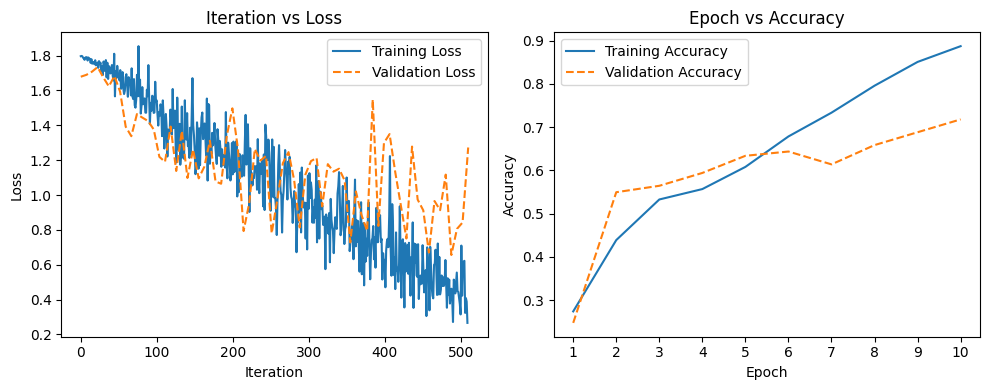

In [82]:
import matplotlib.pyplot as plt
import numpy as np


# Plot Iteration vs Loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(train_loss, label="Training Loss")
plt.plot(np.linspace(0, len(train_loss), len(val_loss)), val_loss, label="Validation Loss", linestyle='--')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iteration vs Loss")
plt.legend()

# Plot Epoch vs Accuracy
acc_X = np.arange(len(train_accuracies)) + 1
val_acc_X = np.arange(len(val_accuracies)) + 1

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(acc_X, train_accuracies, label="Training Accuracy")
plt.plot(val_acc_X, val_accuracies, label="Validation Accuracy", linestyle='--')
plt.xticks(acc_X)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch vs Accuracy")
plt.legend()

plt.tight_layout()
plt.show()




## 5. Testing

Test the model.

In [83]:
# Testing
from torch.utils.data import DataLoader

# Get test data by DataLoader
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Start testing
model.eval()

with torch.no_grad():

    correct = 0
    count = 0
    record = {"labels":list(), "predictions":list()}

    pbar = tqdm(test_loader)
    for batch in pbar:
        input_ids = batch['input_values'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs['loss']

        # make predictions
        predictions = predict(outputs)

        # count accuracy
        correct += predictions.eq(labels).sum().item()
        count += len(labels)
        accuracy = correct * 1.0 / count

        # show progress along with metrics
        pbar.set_postfix({
            'loss': '{:.3f}'.format(loss.item()),
            'accuracy': '{:.3f}'.format(accuracy)
        })

        # record the results
        record["labels"] += labels.cpu().numpy().tolist()
        record["predictions"] += predictions.cpu().numpy().tolist()

    pbar.close()

time.sleep(0.3)
print("The final accuracy on the test dataset: %s%%" % round(accuracy*100,4))

100%|██████████| 203/203 [00:03<00:00, 57.53it/s, loss=0.079, accuracy=0.631]


The final accuracy on the test dataset: 63.0542%


Check the result.

In [84]:
# Convert test record to a pandas DataFrame object
from pandas.core.frame import DataFrame
df_record = DataFrame(record)
df_record.columns = ["Ground Truth","Model Prediction"]

def get_emotion(label_id):
    return model.config.id2label[label_id]

df_record["Ground Truth"] = df_record.apply(lambda x: get_emotion(x["Ground Truth"]), axis=1)
df_record["Model Prediction"] = df_record.apply(lambda x: get_emotion(x["Model Prediction"]), axis=1)

# Concat test texts and test records
df = pd.concat([test_df.reset_index(), df_record["Model Prediction"]], axis=1)
df["emotion"] = df.apply(lambda x: x["emotion"][:3], axis=1)

# Show test result
# pd.set_option('display.max_rows', None)    # Display all rows
# df

# Show incorrect predictions
df[df["emotion"]!=df["Model Prediction"]]

,index,gender,emotion,path,labels,Model Prediction
0,2903,male,W,./Voice/male/W/M20W02.wav,4,S
2,2995,male,F,./Voice/male/F/M19F01.wav,5,H
3,2365,male,N,./Voice/male/N/M03N04.wav,2,S
5,532,female,A,./Voice/female/A/F09A12.wav,1,H
11,205,female,S,./Voice/female/S/F26S02.wav,0,F
...,...,...,...,...,...,...
187,2987,male,F,./Voice/male/F/M32F01.wav,5,H
190,1122,female,W,./Voice/female/W/F24W08.wav,4,A
191,1229,female,W,./Voice/female/W/F02W05.wav,4,H
192,2075,male,N,./Voice/male/N/M40N53.wav,2,H


Display the Confusion Matrix of the result.

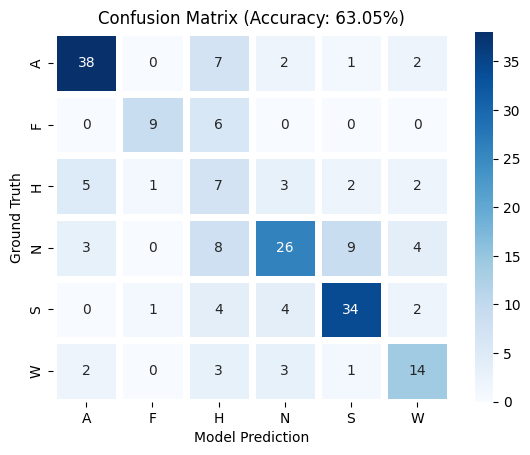

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

crosstab = pd.crosstab(df_record["Ground Truth"], df_record["Model Prediction"])
sns.heatmap(crosstab, cmap='Blues', annot=True, fmt='g', linewidths=5)

accuracy = df_record["Ground Truth"].eq(df_record["Model Prediction"]).sum() / len(df_record["Ground Truth"])
plt.title("Confusion Matrix (Accuracy: %s%%)" % round(accuracy*100, 2))
plt.show()


In [86]:
from sklearn.metrics import classification_report
print(classification_report(df["emotion"], df["Model Prediction"]))


              precision    recall  f1-score   support

           A       0.79      0.76      0.78        50
           F       0.82      0.60      0.69        15
           H       0.20      0.35      0.25        20
           N       0.68      0.52      0.59        50
           S       0.72      0.76      0.74        45
           W       0.58      0.61      0.60        23

    accuracy                           0.63       203
   macro avg       0.63      0.60      0.61       203
weighted avg       0.67      0.63      0.64       203

